- This dataset is related with marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. 
- Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be (or not) subscribed.
- Evaluate the likelihood that customers will choose to open or invest in a bank term deposit account by determining if it's right for them.
- This involves analyzing various factors that influence customer decisions and determining whether the product meets the needs and preferences of the target market.
- Bank term deposit is a financial product offered by banks where you deposit a lump sum of money for a fixed period at a predetermined interest rate.
- Characteristics include fixed tenure (funds deposited for specific time period), fixed interest rate, guaranteed return, penalty for early withdrawal.
- Advantages include safety and security, predictable returns. Disadvantages are lower liquidity and potentially lower returns compared to other investments.


## Data Importing and Pre-processing
- Import dataset and
- import pandas

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# read data
df = pd.read_csv("bank_marketing.csv", sep=";")  # this source file is using ; as separators. With commas we wouldn't include that.
df.head()
#print()
#print(df.tail())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no


In [40]:
# Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
# print dimensions
(df.shape) #shows the dataset has 45211 rows and 17 columns

(45211, 17)

In [41]:
# print data types
(df.info()) #shows data types for each column (for ex: float64, object, int64).
#It also shows the number of non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43872 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    43905 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    43828 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  deposit    45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


- Data was imported by using pandas read csv command

In [43]:
##Clean, wrangle, and handle missing data

- Age, default, and contact are all missing entries.

In [45]:
df.dropna(inplace=True) #dropped all the null values. It made the changes to the original dataframe (not a copy).
# The total number of rows without missing or null values is now 41300.

(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 41300 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        41300 non-null  float64
 1   job        41300 non-null  object 
 2   marital    41300 non-null  object 
 3   education  41300 non-null  object 
 4   default    41300 non-null  object 
 5   balance    41300 non-null  int64  
 6   housing    41300 non-null  object 
 7   loan       41300 non-null  object 
 8   contact    41300 non-null  object 
 9   day        41300 non-null  int64  
 10  month      41300 non-null  object 
 11  duration   41300 non-null  int64  
 12  campaign   41300 non-null  int64  
 13  pdays      41300 non-null  int64  
 14  previous   41300 non-null  int64  
 15  poutcome   41300 non-null  object 
 16  deposit    41300 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.7+ MB


In [46]:
##Transform data appropriately using techniques such as aggregation, normalization, and feature construction

- My theory is that people over the age of 40, with higher education, successful previous marketing campaign, no credit default, higher yearly balance, or no personal loan have a relationship with investing in bank term deposit

In [48]:
# Create a column in the df "Over40"
# For each row in the source data, put a 1 or 0 in the Over40 column
# Feature construction = created a new column for people over the age of 40
df['Over40'] = 1 * (df.age > 40)
(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Over40
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1
5,35.0,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0


In [49]:
#Data Wrangling = I converted the columns that had either 'yes/no' to '1/0' in order to be able to use for analysis.
df['deposit_yes'] = (df.deposit=="yes")*1 #Created new column called 'InvestmentPurchase' which is the same as the 'deposit' column. Yes = 1 and No = 0.
df['default_yes'] = (df.default == 'yes') * 1
df['loan_yes'] = (df.loan == 'yes') * 1
(df.head(200))

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,deposit,Over40,deposit_yes,default_yes,loan_yes
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,1,0,0,0
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,1,0,0,0
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,0,0,0,1
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,1,0,0,0
5,35.0,management,married,tertiary,no,231,yes,no,unknown,5,...,139,1,-1,0,unknown,no,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,59.0,housemaid,divorced,primary,no,195,no,no,unknown,5,...,366,2,-1,0,unknown,no,1,0,0,0
213,36.0,services,married,secondary,no,301,yes,no,unknown,5,...,210,1,-1,0,unknown,no,0,0,0,0
214,54.0,blue-collar,married,primary,no,-41,yes,no,unknown,5,...,288,1,-1,0,unknown,no,1,0,0,0
215,40.0,technician,married,tertiary,no,483,yes,no,unknown,5,...,168,1,-1,0,unknown,no,0,0,0,0


In [50]:
from sklearn.preprocessing import OneHotEncoder

# Example of "hot encoding"
# Used to transform string (text) info into numbers for machine learning analysis
# Sample data
# Use one hot encoder to transform "default" column to numbers
#cols_to_encode = ['default','education','loan','poutcome','deposit'] # add columns to convert to numeric
cols_to_encode = ['education', 'poutcome']
encoder = OneHotEncoder(sparse_output=False)
OHC = encoder.fit_transform(df[cols_to_encode])
DF2 = pd.DataFrame(OHC, columns=encoder.get_feature_names_out(cols_to_encode))
# Concatenate to original DF
# df_concat = pd.concat([df, DF2], axis=1)
(DF2.head())

,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [51]:
df3 = DF2.copy()
df3.insert(0,'Over40',list(df['Over40']))
df3.insert(1,'balance',list(df['balance']))
df3['loan_yes'] = list(df['loan_yes'])
df3['default_yes'] = list(df['default_yes'])
df3['deposit_yes'] = list(df['deposit_yes'])
df3.head()

,Over40,balance,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,loan_yes,default_yes,deposit_yes
0,1,2143,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0
1,1,29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
2,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
3,1,1506,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0
4,0,231,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0


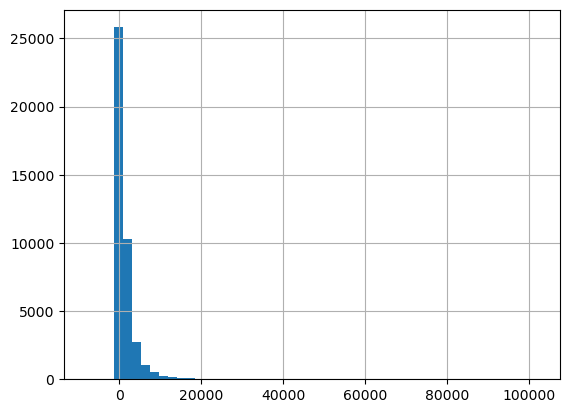

In [52]:
##Reduce redundant data and perform need-based discretization
# Informative histogram of annual balances
hist = df['balance'].hist(bins=50)
plt.show()

In [53]:
# Noted that balance has a huge range. Normalizing to 1.
# Gets is absolute max.
max_balance = df3['balance'].abs().max()

# Divide all of its values by that max.
df3['balance'] = df3['balance']/max_balance
df3.head()


,Over40,balance,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,loan_yes,default_yes,deposit_yes
0,1,0.020984,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0
1,1,0.000284,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
2,0,0.000020,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
3,1,0.014746,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0
4,0,0.002262,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0


## Data Analysis and Visualization

In [55]:
##Identify categorical, ordinal, and numerical variables within the data
#Categorical variables are: job, marital, contact, month, poutcome.
#ordinal variables are: education.
#Numerical variables are: age, balance, day, duration, pdays, campaign, previous.

In [56]:
##Provide measures of centrality and distribution with visualizations
df[["age", "balance", "day", "duration", "pdays", "campaign", "previous"]].describe()

,age,balance,day,duration,pdays,campaign,previous
count,41300.000000,41300.000000,41300.000000,41300.000000,41300.000000,41300.000000,41300.000000
mean,40.918475,1366.560169,15.797094,258.273317,40.332470,2.762446,0.581211
std,10.598498,3074.914836,8.322802,257.374134,100.354414,3.089386,2.342202
min,18.000000,-8019.000000,1.000000,0.000000,-1.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,-1.000000,1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,-1.000000,2.000000,0.000000
75%,48.000000,1431.000000,21.000000,319.000000,-1.000000,3.000000,0.000000
max,95.000000,102127.000000,31.000000,3881.000000,871.000000,63.000000,275.000000


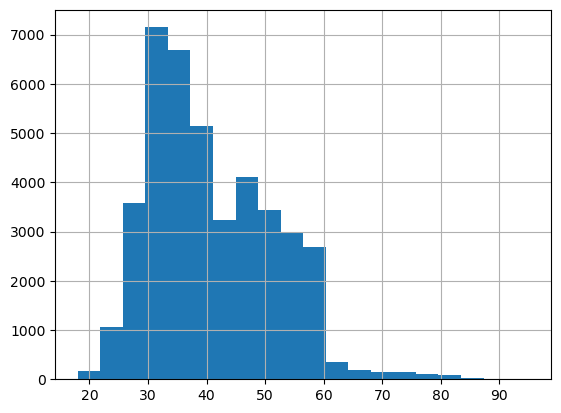

In [57]:
hist = df['age'].hist(bins=20)
plt.show()

In [58]:
##Diagnose for correlations between variables and determine independent and dependent variables
(df3.corr())
# simple correlation shows that there is a relationship between 'poutcome' and the client investing in bank term deposit.

,Over40,balance,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,loan_yes,default_yes,deposit_yes
Over40,1.000000,0.066409,0.169480,-0.062827,-0.094439,0.070479,-0.021181,-0.026523,0.006238,0.027656,0.006402,-0.007393,-0.010556
balance,0.066409,1.000000,-0.017835,-0.068015,0.084074,0.010287,0.013062,0.007410,0.035950,-0.031038,-0.084406,-0.066705,0.052784
education_primary,0.169480,-0.017835,1.000000,-0.433029,-0.272868,-0.086207,-0.021778,-0.009660,-0.031847,0.037304,-0.014823,0.001040,-0.040262
education_secondary,-0.062827,-0.068015,-0.433029,1.000000,-0.665397,-0.210220,0.009877,0.009980,-0.026066,-0.000903,0.070256,0.013544,-0.034346
education_tertiary,-0.094439,0.084074,-0.272868,-0.665397,1.000000,-0.132468,0.010386,-0.000760,0.048698,-0.030665,-0.044541,-0.014426,0.064638
education_unknown,0.070479,0.010287,-0.086207,-0.210220,-0.132468,1.000000,-0.009584,-0.006031,0.011241,0.005563,-0.048330,-0.002853,0.010615
poutcome_failure,-0.021181,0.013062,-0.021778,0.009877,0.010386,-0.009584,1.000000,-0.071622,-0.065212,-0.740209,-0.004207,-0.027238,0.009209
poutcome_other,-0.026523,0.007410,-0.009660,0.009980,-0.000760,-0.006031,-0.071622,1.000000,-0.038081,-0.432252,-0.008114,-0.013005,0.031804
poutcome_success,0.006238,0.035950,-0.031847,-0.026066,0.048698,0.011241,-0.065212,-0.038081,1.000000,-0.393566,-0.052869,-0.023290,0.305093
poutcome_unknown,0.027656,-0.031038,0.037304,-0.000903,-0.030665,0.005563,-0.740209,-0.432252,-0.393566,1.000000,0.032126,0.039425,-0.165608


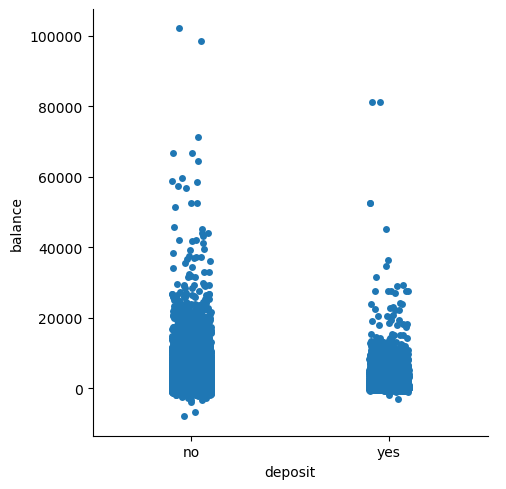

In [59]:
##Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest
# Look for relationships between columns visually
sns.catplot(data=df, x="deposit", y="balance")
plt.show() #this graph shows individuals who invested in the 'bank term deposit' based on their avg yearly balance.

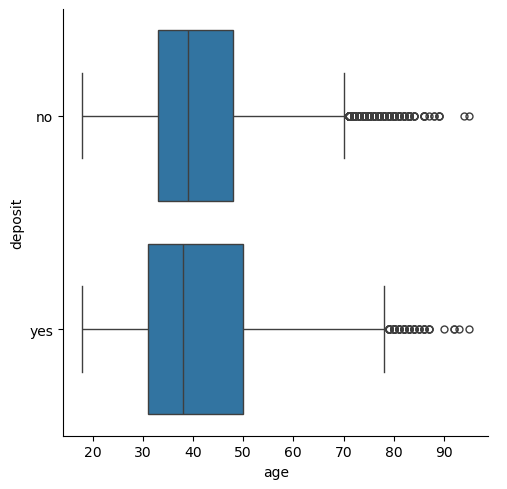

In [60]:
sns.catplot(data=df, x="age", y="deposit",kind="box")
plt.show()

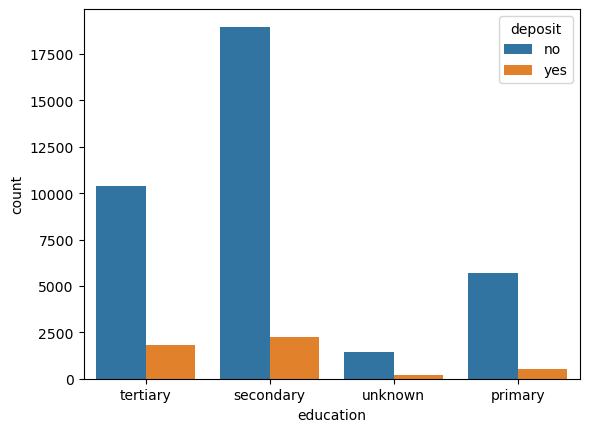

In [61]:
sns.countplot(df, x="education", hue="deposit")
plt.show()

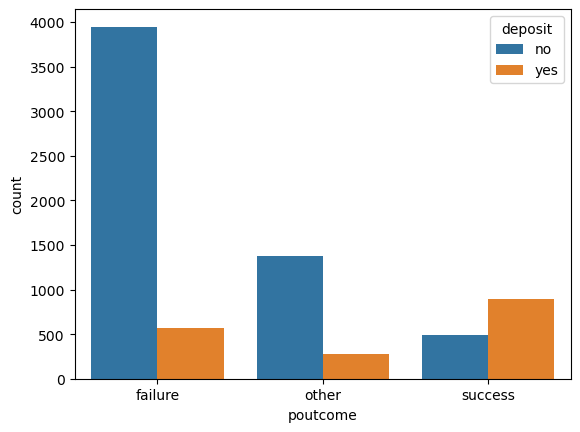

In [62]:
# Make special df with rows deleted where poutcome was unknown
df_outcome = df.drop(df[df.poutcome == "unknown"].index)
sns.countplot(df_outcome, x="poutcome", hue="deposit")
plt.show()

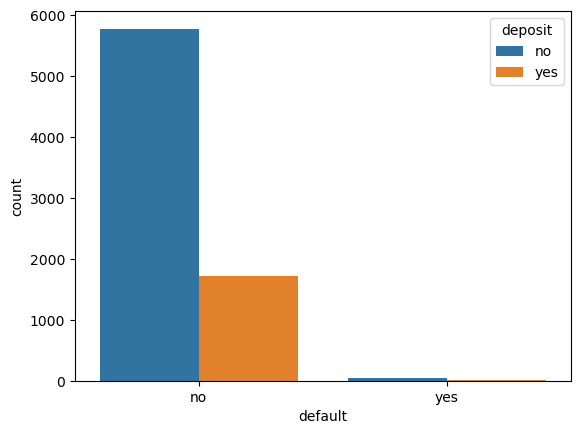

In [63]:
sns.countplot(df_outcome, x="default", hue="deposit")
plt.show()

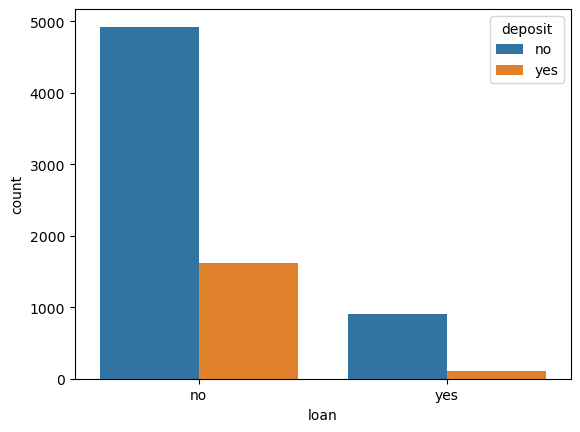

In [64]:
sns.countplot(df_outcome, x="loan", hue="deposit")
plt.show()

## Data Analytics

In [66]:
#Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables

- This project would need supervised learning because we have a labeled dataset where the target 'deposit' is known.


In [68]:
#Train, test, and provide accuracy and evaluation metrics for model results

In [69]:
from sklearn.model_selection import train_test_split

# Divide dataframe into dependent (y) and independent (X) data
data = df3.values
X = data[:, :-1]  # get all the prepped data (independent data)
y = data[:, -1]  # get deposit column (deposit_yes)
print(X.shape, y.shape)

(41300, 12) (41300,)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(33040, 12) (8260, 12) (33040,) (8260,)


In [71]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41300 entries, 0 to 41299
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Over40               41300 non-null  int64  
 1   balance              41300 non-null  float64
 2   education_primary    41300 non-null  float64
 3   education_secondary  41300 non-null  float64
 4   education_tertiary   41300 non-null  float64
 5   education_unknown    41300 non-null  float64
 6   poutcome_failure     41300 non-null  float64
 7   poutcome_other       41300 non-null  float64
 8   poutcome_success     41300 non-null  float64
 9   poutcome_unknown     41300 non-null  float64
 10  loan_yes             41300 non-null  int64  
 11  default_yes          41300 non-null  int64  
 12  deposit_yes          41300 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 4.1 MB


In [133]:
# https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

# Trying out the RFC ML system
model = RandomForestClassifier(random_state=1)
# Studies the data and creates the "model" -- attempting to find a relationship between the dependent (deposit)
# and independent variables (age, balance, ....)
model.fit(X_train, y_train)

y_prediction = model.predict(X_test)
acc = accuracy_score(y_test, y_prediction)
acc


0.8441888619854722

In [73]:
# RandomFoestClassifier is a machine learning algorithm that predicts a result by combining multiple decision trees.
# Given the variables (0-13) it can predict 'deposit_yes' with 84.4% accuracy. In other words, those variables (age, education, etc)
# can predict with 84.3% accuracy that the customers are subscribed or invested in the bank term deposits.

In [127]:
# https://www.kdnuggets.com/beginners-guide-to-machine-learning-with-python
# Initialize the models
models = {
    "RandomForestClassifier": RandomForestClassifier(random_state=1),
}

# Dictionary to store the results
results = {}

# Fit the models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    if name == "RandomForestClassifier":
        y_prediction = model.predict(X_test)
        acc = accuracy_score(y_test, y_prediction)
    else:
        acc = "NA"
    
    # Store results
    results[name] = {'MSE': mse, 'R^2 Score': r2, 'ACC':acc}

# Print the results
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']}, R^2 Score: {metrics['R^2 Score']}, ACCURACY: {metrics['ACC']}")

RandomForestClassifier - MSE: 0.15581113801452784, R^2 Score: -0.5848120944373658, ACCURACY: 0.8441888619854722
